In [55]:
import pandas as pd
from sympy import *
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задача 1

In [8]:
XY = pd.DataFrame([[0.2,0.08,0.05,0.01], 
                  [0.18,0.08,0.06,0.01], 
                  [0.15,0.09,0.07,0.02]], index = [1,2,3])
                  
XY

,0,1,2,3
1,0.20,0.08,0.05,0.01
2,0.18,0.08,0.06,0.01
3,0.15,0.09,0.07,0.02


In [26]:
X = XY.sum(axis = 1)
print(f'Частное распределение X:\n {X}')
Y = XY.sum(axis = 0)
print(f'Частное распределение Y:\n {Y}')

Частное распределение X:
 1    0.34
2    0.33
3    0.33
dtype: float64
Частное распределение Y:
 0    0.53
1    0.25
2    0.18
3    0.04
dtype: float64


In [61]:
X[2]

0.33

In [37]:
def dependence(XY):
    n = 0
    for i in XY.columns:
        for j in XY.index:
            if XY.loc[j, i] != X[j] * Y[i]:
                n = 1
                print('Величины X и Y зависимы')
                break
        if n > 0: 
            break
    if n == 0:
        print('Величины X и Y не зависимы')


In [38]:
dependence(XY)

Величины X и Y зависимы


In [57]:
EXY = 0
EX = 0
EY = 0
varX = 0
varY = 0
n = 0
for i in XY.columns:
    for j in XY.index:
        EXY += XY.loc[j, i] * i * j
        if n == 0:
            EX += X[j] * j
    n = 1
    EY += Y[i] * i

for i in XY.columns:
    varY = (i - EY)**2 * Y[i]
for j in XY.index:
    varX = (j - EX)**2 * X[j]

covXY = round(EXY - EX * EY, 3)
corrXY = round(covXY / sqrt(varX * varY), 3)
print(f"Ковариация X и Y = {covXY}")
print(f"Корреляция X и Y = {corrXY}")

Ковариация X и Y = 0.087
Корреляция X и Y = 0.330


Величины X и Y имеют слабую прямую коррляцию

In [67]:
Y2 = XY.loc[2,:] / X[2]
print(f'Распределение числа котов в 2-х комнатной квартире:\n {Y2}')
Y2mean = 0
for i in Y2.index:
    Y2mean += i * Y2[i]
print(f'Среднее число котов в 2-х комнатной квартире:\n {round(Y2mean,2)}')    

Распределение числа котов в 2-х комнатной квартире:
 0    0.545455
1    0.242424
2    0.181818
3    0.030303
Name: 2, dtype: float64
Среднее число котов в 2-х комнатной квартире:
 0.7


In [69]:
X1 = XY.loc[:,1] / Y[1]
print(f'Распределение числа комнат в квартире с одним котом:\n {X1}')
X1mean = 0
for i in X1.index:
    X1mean += i * X1[i]
print(f'Среднее число комнат квартире с одним котом:\n {round(X1mean,2)}')  

Распределение числа комнат в квартире с одним котом:
 1    0.32
2    0.32
3    0.36
Name: 1, dtype: float64
Среднее число комнат квартире с одним котом:
 2.04


# Задача 2

In [73]:
data = pd.DataFrame([[3,3.5,4,5,6,6.5,7,8,8.5,9], 
                     [17,22,14,17,15,12,11,9,8,6], 
                     [9.1,5.5,12.3,9.2,14.2,16.8,22.0,18.3,24.5,22.7]], 
                     index = ['X', 'Y', 'Z'], 
                    columns = [1,2,3,4,5,6,7,8,9,10])
data = data.transpose()
data

,X,Y,Z
1,3.0,17.0,9.1
2,3.5,22.0,5.5
3,4.0,14.0,12.3
4,5.0,17.0,9.2
5,6.0,15.0,14.2
6,6.5,12.0,16.8
7,7.0,11.0,22.0
8,8.0,9.0,18.3
9,8.5,8.0,24.5
10,9.0,6.0,22.7


In [74]:
corr = data.corr()
corr

,X,Y,Z
X,1.000000,-0.908020,0.917953
Y,-0.908020,1.000000,-0.943831
Z,0.917953,-0.943831,1.000000


<AxesSubplot:>

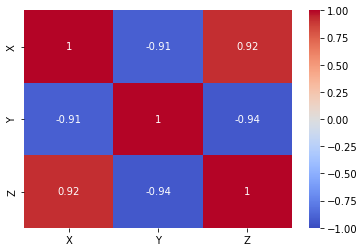

In [75]:
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

Таблица корреляций говорит о сильной коррелляции между исследуемыми параметрами(прямой или обратной). Чем выше дозировка(X), тем меньше время до наступления действия лекартсва(Y), и тем больше срок действия лекарства(Z). Чем меньше время наступления действия лекарства(Y), тем выше срок действия лекарства(Z).